<div class="alert alert-block alert-success"> 
<h1>Tasks 2 - Discrete distributions</h1>
</div>

Постройте в Python функцию **binom_analysis** (для всех расчетов используйте binom из scipy.stats)**.** 

**На вход она берет:**

- n — количество экспериментов,
- p — вероятность успеха,
- sample_size — размер выборки для построения выборочной функции плотности (по умолчанию составляет 10 000).

**Функция должна уметь:**

1. Расчет среднего, дисперсии и стандартного отклонения биномиального распределения с заданными параметрами и print этих показателей с расшифровками.
1. Расчет ряда кумулятивных вероятностей (функция распределения) для всех k, пробегающих от 0 до n (ряд **cdf**).
1. Расчет ряда некумулятивных вероятностей (функция плотности вероятности) для всех k, пробегающих от 0 до n.
1. Собирает в единый датафрейм ряд k, ряд cdf, ряд pdf.
1. Добавить в этот датафрейм ряд биномиальных коэффициентов, которые рассчитываются отдельной функцией **binom_coeff** (использовать функцию comb из scipy.special).
1. Отображение barplot (seaborn) функции распределения и функции плотности (на двух разных графиках). Установить размер (figsize) на (20, 10). Сделать ротацию тиков на X-оси на 60 градусов.
1. Отображение histplot (seaborn) функции плотности выборочного распределения Бернулли (на основании sample_size). Для создания рандомной выборки использовать функцию **rvs** из binom.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.special import comb

In [2]:
# n — количество экспериментов
# p — вероятность успехаb
# sample_size — размер выборки для построения выборочной функции плотности

sample_size, n, p = 10000, 10, 0.5

In [3]:
# функция вычисления биномиальных коэффициентов

def binom_coeff (n, k):
    return comb(n, k)

In [4]:
def binom_analysis (sample_size, n, p):
    
    
#     1. Расчет среднего, дисперсии и стандартного отклонения биномиального распределения
#        с заданными параметрами и print этих показателей с расшифровками

    print('Математическое ожидание:', n*p)
    print('Дисперсия:', n*p*(1-p))
    print('Стандартное отклонение: %.3f' % (n*p)**0.5)
    
    
#     2. Расчет ряда кумулятивных вероятностей (функция распределения) для всех k, пробегающих от 0 до n (ряд cdf)

    pb = binom(n, p) # applying the binom class
    k = np.arange(0, n+1)
    binomial_cdf = pb.cdf(k) # Cumulative distribution function (кумулятивное распределение)
    
    
#     3. Расчет ряда некумулятивных вероятностей (функция плотности вероятности) для всех k, пробегающих от 0 до n
    
    binomial_pmf = pb.pmf(k) # Probability mass function (распределение плотности, вероятностная масса)
    
    
#     4. Сборка в единый датафрейм ряд k, ряд cdf, ряд pdf
    
    # собираю DataFrame. Почему-то собрался в длину - переворачиваю
    binom_distribution_df = pd.DataFrame([k, binomial_pmf, binomial_cdf],\
                                         index = ['k', 'binomial_cdf', 'binomial_pmf']).transpose()
    
    
#     5. Добавить в этот датафрейм ряд биномиальных коэффициентов, которые рассчитываются отдельной функцией
#        binom_coeff (использовать функцию comb из scipy.special)

    # добавление к датафрейму биномиальных коэффициентов
    binom_distribution_df['binom_coeff']= pd.DataFrame(comb(n, k))
    
    
#     6. Отображение barplot (seaborn) функции распределения и функции плотности (на двух разных графиках).
#        Установить размер (figsize) на (20, 10). Сделать ротацию тиков на X-оси на 60 градусов
    
    plt.subplots(figsize=(20,10))
    sns.barplot(x = k, y = binomial_cdf)
    plt.xticks(rotation = 60)
    plt.ylabel('Cumulative distribution')
    plt.xlabel('Intervals')
    plt.show()

    plt.subplots(figsize=(20,10))
    sns.barplot(x = k, y = binomial_pmf)
    plt.xticks(rotation = 60)
    plt.ylabel('Probability mass')
    plt.xlabel('Intervals')
    plt.show()
    
    
#     7. Отображение histplot (seaborn) функции плотности выборочного распределения Бернулли (на основании sample_size).
#        Для создания рандомной выборки использовать функцию rvs из binom
    
    # строим выборку из биноминального распределения Бернулли
    bernoulli_distribution = bernoulli(p).rvs(size = sample_size)
    
    # Гистограмма для функции плотности выборочного распределения Бернулли

    sns.histplot(bernoulli_distribution, stat='probability')
    plt.title('Распределение Bernoulli')

    plt.show()
    
    # вывожу датафрейм
    return binom_distribution_df
    

Математическое ожидание: 5.0
Дисперсия: 2.5
Стандартное отклонение: 2.236


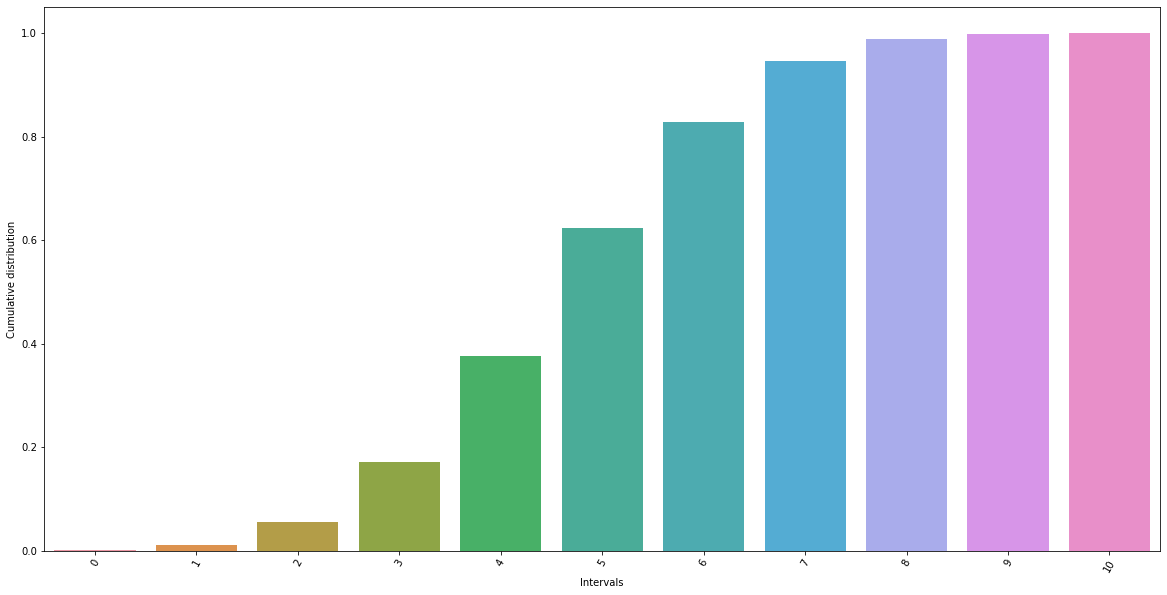

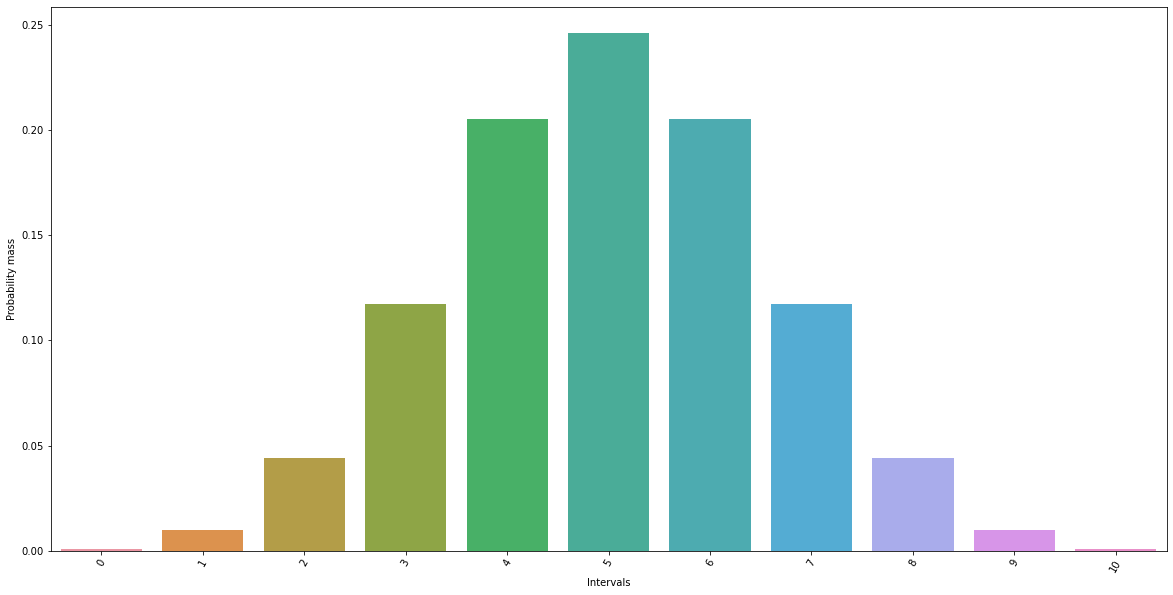

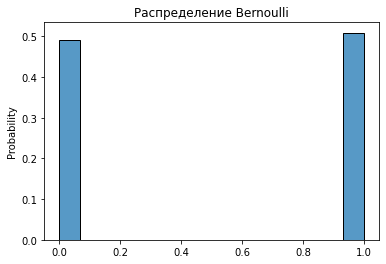

,k,binomial_cdf,binomial_pmf,binom_coeff
0,0.0,0.000977,0.000977,1.0
1,1.0,0.009766,0.010742,10.0
2,2.0,0.043945,0.054688,45.0
3,3.0,0.117188,0.171875,120.0
4,4.0,0.205078,0.376953,210.0
5,5.0,0.246094,0.623047,252.0
6,6.0,0.205078,0.828125,210.0
7,7.0,0.117187,0.945312,120.0
8,8.0,0.043945,0.989258,45.0
9,9.0,0.009766,0.999023,10.0


In [5]:
# вывожу результат работы функции
binom_analysis(sample_size, n, p)